Run a "fit" of the TFR on simulated data (`SGA_TFR_simtest.fits`, from Segev) to test how well `hyperfit` recovers the slope.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
from matplotlib import cm, colors
from matplotlib.patches import Ellipse
import matplotlib as mpl

from astropy.table import Table

import corner

from line_fits import param_invert, hyperfit_line

import sys
sys.path.insert(1, '/global/u1/k/kadglass/DESI_SGA/TF/SV/')
from help_functions import adjust_lightness

In [2]:
h = 1
H0 = 100*h

c = 3e5

q0 = 0.2

V0 = 2.5 # Set 0-pt of the TFR

# Data

Simulated data generated by Segev

In [3]:
tdata = Table.read('SGA_TFR_simtest.fits')
tdata[:5]

R_MAG_SB26,R_MAG_SB26_ERR,V_0p33R26,V_0p33R26_err
float64,float32,float64,float64
17.346001212929632,0.020990388,21.9249378228301,2.7530540703953075
17.606960302175946,0.020990388,28.26862984087483,3.549614009253001
18.19465549073917,0.020990388,29.064586064329543,2.3131574091995906
17.30673670853458,0.034207974,32.11712976091118,4.902135104560866
17.40255876184182,0.025045846,29.53061149548402,0.6741295491452111


# Simulated TFR

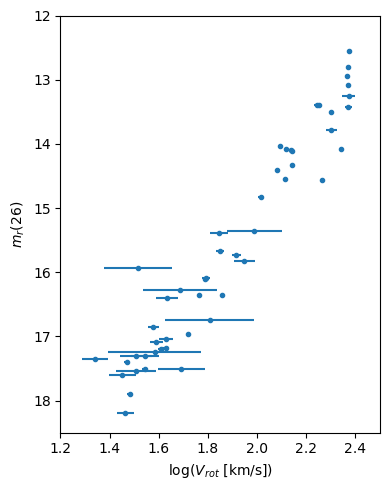

In [6]:
plt.figure(figsize=(4,5), tight_layout=True)

plt.errorbar(np.log10(tdata['V_0p33R26']), 
             tdata['R_MAG_SB26'], 
             xerr=0.434*tdata['V_0p33R26_err']/tdata['V_0p33R26'], 
             yerr=tdata['R_MAG_SB26_ERR'], 
             fmt='.')

plt.xlim([1.2, 2.5])
plt.ylim([18.5, 12])

plt.xlabel('log($V_{rot}$ [km/s])')
plt.ylabel('$m_r (26)$');

# Fit the ITFR using `hyperfit`

In [7]:
bounds_itfr = ((-1000.0, 1000.0), (-10.0, 10.0), (1.0e-5, 500.0))

w0, w1, sig_w, cov_w, itfr_mcmc_samples, hf_itfr = hyperfit_line(tdata['R_MAG_SB26'], 
                                                                 np.log10(tdata['V_0p33R26']) - V0, 
                                                                 tdata['R_MAG_SB26_ERR'], 
                                                                 0.434*tdata['V_0p33R26_err']/tdata['V_0p33R26'], 
                                                                 bounds_itfr)

     fun: -102.8254201020596
     jac: array([0.01636948, 0.02182503, 0.19847164])
 message: 'Optimization terminated successfully.'
    nfev: 5203
     nit: 114
 success: True
       x: array([0.41793047, 2.23205825, 0.06532475])


100%|██████████| 1000/1000 [00:00<00:00, 2323.04it/s]


Niterations/Max Iterations:  1000 / 100000
Integrated ACT/Min Convergence Iterations:  [32.6490577  32.93743731 30.18267941] / 1646.8718657220027


100%|██████████| 1000/1000 [00:00<00:00, 2361.33it/s]


Niterations/Max Iterations:  2000 / 100000
Integrated ACT/Min Convergence Iterations:  [38.93459654 38.78470733 28.53989126] / 1946.7298270456308


100%|██████████| 1000/1000 [00:00<00:00, 2287.63it/s]


Niterations/Max Iterations:  3000 / 100000
Integrated ACT/Min Convergence Iterations:  [45.11755645 44.65540143 28.75170331] / 2255.8778225488404


100%|██████████| 1000/1000 [00:00<00:00, 2352.73it/s]


Niterations/Max Iterations:  4000 / 100000
Integrated ACT/Min Convergence Iterations:  [44.63036245 44.55757021 39.4944518 ] / 2231.518122309034


100%|██████████| 1000/1000 [00:00<00:00, 2248.06it/s]


Niterations/Max Iterations:  5000 / 100000
Integrated ACT/Min Convergence Iterations:  [43.59013481 43.41383265 36.28222005] / 2179.5067403426815


100%|██████████| 1000/1000 [00:00<00:00, 2355.22it/s]


Niterations/Max Iterations:  6000 / 100000
Integrated ACT/Min Convergence Iterations:  [52.23746503 52.08104273 31.52064103] / 2611.873251638608


100%|██████████| 1000/1000 [00:00<00:00, 2234.48it/s]


Niterations/Max Iterations:  7000 / 100000
Integrated ACT/Min Convergence Iterations:  [51.88220153 51.50175408 33.31428073] / 2594.110076470587


100%|██████████| 1000/1000 [00:00<00:00, 2387.26it/s]


Niterations/Max Iterations:  8000 / 100000
Integrated ACT/Min Convergence Iterations:  [52.17899571 52.05186951 35.58104263] / 2608.9497855727045


100%|██████████| 1000/1000 [00:00<00:00, 2171.34it/s]


Niterations/Max Iterations:  9000 / 100000
Integrated ACT/Min Convergence Iterations:  [49.27427698 49.38743814 35.73521515] / 2469.3719068998857


100%|██████████| 1000/1000 [00:00<00:00, 2194.19it/s]


Niterations/Max Iterations:  10000 / 100000
Integrated ACT/Min Convergence Iterations:  [47.79469556 47.71702361 38.2743865 ] / 2389.7347778897342


100%|██████████| 1000/1000 [00:00<00:00, 2195.08it/s]


Niterations/Max Iterations:  11000 / 100000
Integrated ACT/Min Convergence Iterations:  [48.09662011 48.07640967 41.61475948] / 2404.8310052782585


100%|██████████| 1000/1000 [00:00<00:00, 2218.09it/s]


Niterations/Max Iterations:  12000 / 100000
Integrated ACT/Min Convergence Iterations:  [48.9072364  48.85774363 41.93775498] / 2445.3618201266513


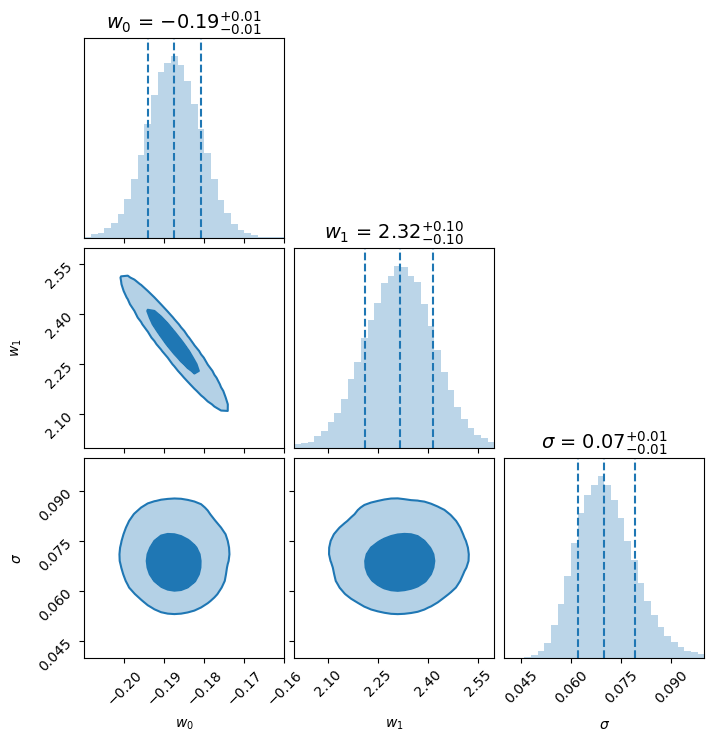

In [12]:
fig = corner.corner(itfr_mcmc_samples.T, bins=30, smooth=1,
                    range=[[-0.21, -0.16], [2, 2.6], [0.04, 0.1]],   # Range for w0, w1, sigma. Adjust as needed.
                    labels=['$w_0$', '$w_1$', r'$\sigma$'],
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)),
                    quantiles=[0.16, 0.5, 0.84],
                    color='tab:blue',
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3},
                    plot_datapoints=False,
                    fill_contours=True,
                    show_titles=True,
                    title = {'simulated data'},
                    title_kwargs={"fontsize": 14})

In [13]:
a_itfr, b_itfr, cov_itfr = param_invert(w0, w1, cov_w[:2,:2])

print(f'         w0: {w0:.3f} +/- {np.sqrt(cov_w[0,0]):.3f}')
print(f'         w1:  {w1:.2f}  +/- {np.sqrt(cov_w[1,1]):.2f}')
print(f'      slope: {a_itfr:.2f}  +/- {np.sqrt(cov_itfr[0,0]):.2f}')
print(f'y-intercept: {b_itfr:.2f}  +/- {np.sqrt(cov_itfr[1,1]):.2f}')

         w0: -0.188 +/- 0.007
         w1:  2.32  +/- 0.10
      slope: -5.33  +/- 0.19
y-intercept: 12.34  +/- 0.13


## Plot the TFR

In [14]:
# Invert the MCMC samples so that they represent (a, b) and not (w0, w1)
tfr_mcmc_samples = np.zeros(itfr_mcmc_samples.shape)

tfr_mcmc_samples[0] = 1./itfr_mcmc_samples[0]
tfr_mcmc_samples[1] = -itfr_mcmc_samples[1]/itfr_mcmc_samples[0]
tfr_mcmc_samples[2] = itfr_mcmc_samples[2]

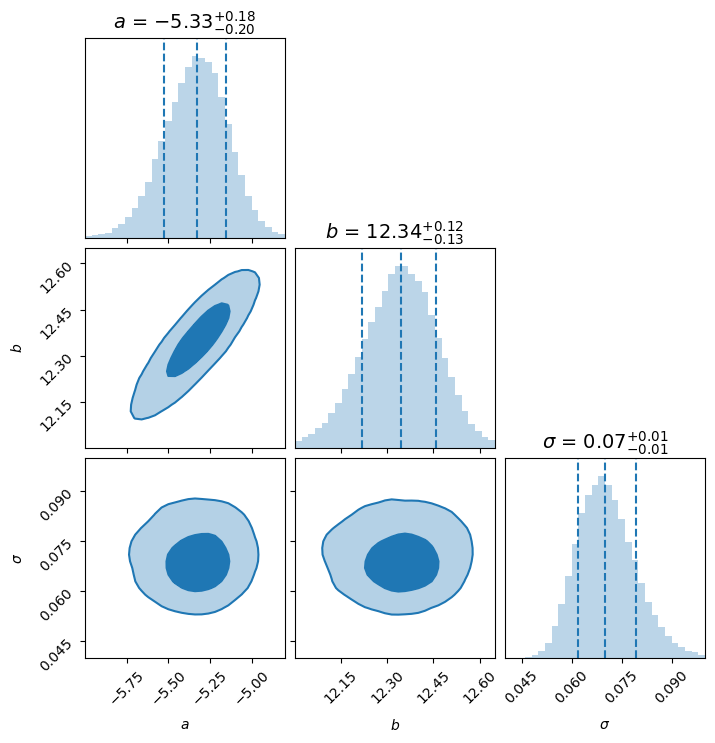

In [17]:
fig = corner.corner(tfr_mcmc_samples.T, bins=30, smooth=1,
                    range=[[-6, -4.8], [12, 12.65], [0.04, 0.1]],   # Range for a, b, sigma. Adjust as needed.
                    labels=['$a$', '$b$', r'$\sigma$'],
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)),
                    quantiles=[0.16, 0.5, 0.84],
                    color='tab:blue',
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3},
                    plot_datapoints=False,
                    fill_contours=True,
                    show_titles=True,
                    title = {'Coma'},
                    title_kwargs={"fontsize": 14});

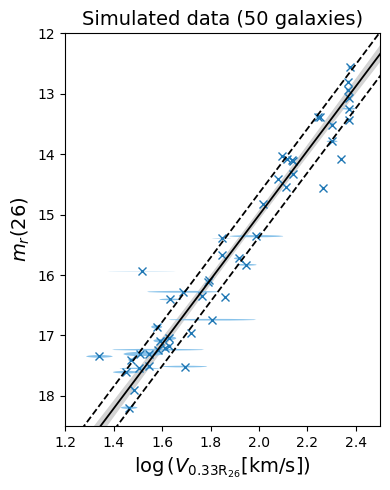

In [18]:
sigmas = hf_itfr.get_sigmas()
xvals = np.linspace(1., 3., 1000)
yvals = a_itfr * (xvals - V0) + b_itfr

# Get the MCMC 1-sigma quantiles to plot with the fit.
y_chain = np.outer(xvals - V0, tfr_mcmc_samples[0]) + tfr_mcmc_samples[1]
y_chain_quantiles = np.quantile(y_chain, [0.1587, 0.8414], axis=1)

# Pack info into data
data = [np.log10(tdata['V_0p33R26']), tdata['R_MAG_SB26']]
x_err = 0.434*tdata['V_0p33R26_err']/tdata['V_0p33R26']
y_err = tdata['R_MAG_SB26_ERR']
corr_xy = np.zeros_like(x_err)

# Generate ellipses
ells = [
    Ellipse(
        xy=[data[0][i], data[1][i]],
        width=2*y_err[i],
        height=2*x_err[i],
        angle=np.rad2deg(np.arccos(corr_xy[i])),
    )
    for i in range(len(data[0]))
]

# Make the plot
fig, ax = plt.subplots(figsize=(4,5), tight_layout=True)
ax.fill_between(xvals, y_chain_quantiles[0], y_chain_quantiles[1], color="lightgray")
for i, e in enumerate(ells):
    ax.add_artist(e)
    e.set_facecolor(adjust_lightness('tab:blue', amount=1.75))
ax.plot(data[0], data[1], 'x')
ax.plot(xvals, yvals, c="k", marker="None", ls="-", lw=1.3)
ax.plot(xvals - hf_itfr.vert_scat, yvals, c="k", marker="None", ls="--", lw=1.3)
ax.plot(xvals + hf_itfr.vert_scat, yvals, c="k", marker="None", ls="--", lw=1.3)
ax.set_xlabel(r"$\log{(V_\mathrm{0.33R_{26}} [\mathrm{km/s}])}$", fontsize=14)
ax.set_ylabel(r"$m_r(26)$", fontsize=14)
ax.set_title("Simulated data ({} galaxies)".format(len(tdata)), fontsize = 14)
ax.set_xlim(1.2, 2.5)
ax.set_ylim(18.5, 12);